In [13]:
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import check_output
from json import loads
%matplotlib inline

In [56]:
!go build -o fsbench main.go

In [118]:
def run(size=1024, page_size=4096, count=100, avg=1):
    results = [loads(
        check_output(
            [
                "./fsbench",
                "-size",
                str(size),
                "-pageSize",
                str(page_size),
                "-count",
                str(count),
            ]
        )
    ) for _ in range(avg)]
    return {
        "Size": sum([i["Size"] for i in results]) / avg,
        "PageSize": sum([i["PageSize"] for i in results]) / avg,
        "Count": sum([i["Count"] for i in results]) / avg,
        "TotalTime": sum([i["TotalTime"] for i in results]) / avg,
        "TotalHeap": sum([i["TotalHeap"] for i in results]) / avg,
    }

In [119]:
run()

{'Size': 4194304.0,
 'PageSize': 4096.0,
 'Count': 100.0,
 'TotalTime': 1628775.0,
 'TotalHeap': 1031304.0}

In [133]:
test_runs = [run(avg=20) for _ in range(500)]

In [134]:
test_runs_df = pd.DataFrame(test_runs)

In [135]:
test_runs_df

,Size,PageSize,Count,TotalTime,TotalHeap
0,4194304.0,4096.0,100.0,1328533.50,1030824.0
1,4194304.0,4096.0,100.0,1239735.75,1030758.4
2,4194304.0,4096.0,100.0,1070885.85,1030670.4
3,4194304.0,4096.0,100.0,1047770.30,1030481.6
4,4194304.0,4096.0,100.0,1099763.75,1030796.8
...,...,...,...,...,...
495,4194304.0,4096.0,100.0,1108725.55,1030700.0
496,4194304.0,4096.0,100.0,1108951.90,1030545.6
497,4194304.0,4096.0,100.0,1184005.90,1030756.8
498,4194304.0,4096.0,100.0,1101139.20,1030456.8


<Axes: xlabel='index'>

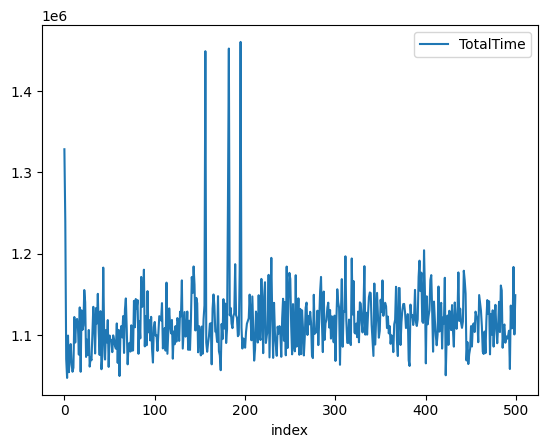

In [136]:
test_runs_df.reset_index().plot(x="index", y="TotalTime")

In [137]:
page_size_runs = [run(page_size=i, size=64*1024, count=10, avg=4) for i in range(64, 128*1024, 128)]

In [138]:
page_size_runs_df = pd.DataFrame(page_size_runs)

In [139]:
page_size_runs_df

,Size,PageSize,Count,TotalTime,TotalHeap
0,4.194304e+06,64.0,10.0,381187.00,1768960.0
1,1.258291e+07,192.0,10.0,453322.75,1770856.0
2,2.097152e+07,320.0,10.0,370656.25,1777096.0
3,2.936013e+07,448.0,10.0,373113.00,1779616.0
4,3.774874e+07,576.0,10.0,350326.50,1782852.0
...,...,...,...,...,...
1019,8.552186e+09,130496.0,10.0,4172214.50,11683680.0
1020,8.560574e+09,130624.0,10.0,4857018.00,11551000.0
1021,8.568963e+09,130752.0,10.0,4230282.75,11682056.0
1022,8.577352e+09,130880.0,10.0,4572397.50,11552484.0


<Axes: xlabel='PageSize'>

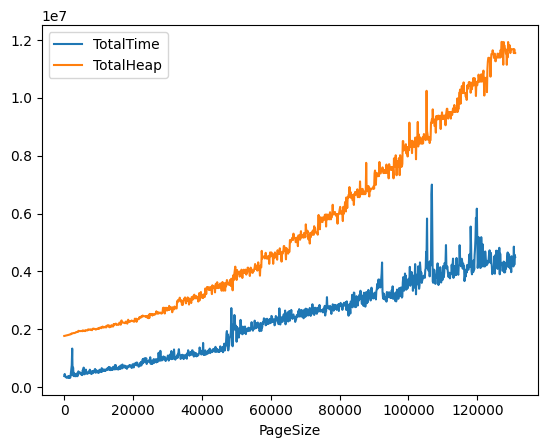

In [140]:
page_size_runs_df.plot(x="PageSize", y=["TotalTime", "TotalHeap"])

In [141]:
count_runs = [run(size=32*1024,count=i,avg=4) for i in range(0,4096,4)]

In [142]:
count_runs_df = pd.DataFrame(count_runs)

<Axes: xlabel='Count'>

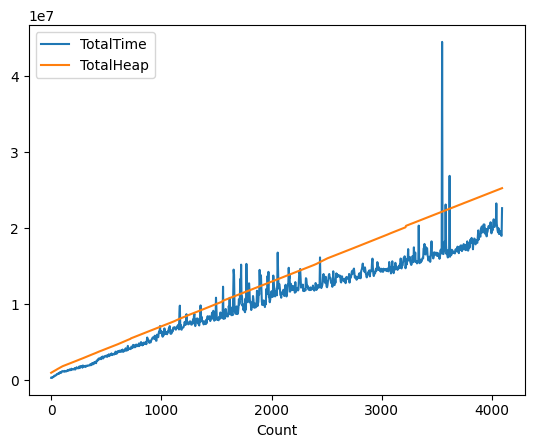

In [143]:
count_runs_df.plot(x="Count", y=["TotalTime", "TotalHeap"])